In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

We will solve this problem in two parts:
1. Solving the height of the air cavity in the diver
2. Solving the motion of the diver

We will also assume the diver has a constant cavity area (ie. it is just a prism)

For the air bubble, we can equate its internal pressure to the pressure at its base and write boyle's law
$$
\begin{align}
&P = P_{ext} + \rho g (x + h) \\
&P h = P_o h_o
\end{align}
$$

Solving, we get
$$
h = \frac{\sqrt{4\rho g h_o P_o + (P_{ext} + \rho g x)^2} - (P_{ext} + \rho g x)}{2 \rho g}
$$

Now, we can write Newton's second law for the diver to get
$$
\begin{align}
m \ddot{x} &= m g - k \dot{x} - \rho g (V_{diver} + A h) \\
&= m g - k \dot{x} - \rho g (V_{diver} + A \frac{\sqrt{4\rho g h_o P_o + (P_{ext} + \rho g x)^2} - (P_{ext} + \rho g x)}{2 \rho g})
\end{align}
$$

At the critical depth, the sign of the acceleration of the diver changes sign and is 0: $\ddot{x}=0$. Assuming $\dot{x}=0$, the critical depth $x_{crit}$ is given by
$$
x_{crit} = \frac{g \left(m - \rho V_{diver} \right)^2 - A \left(\rho A h_o P_o + \rho V_{diver} P_{ext} - m P_{ext} \right)}{\rho g A \left( \rho V_{diver} - m \right)}
$$

The code below plots this critical depth against some parameters

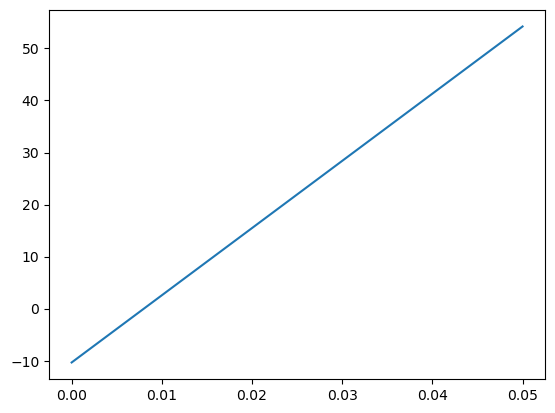

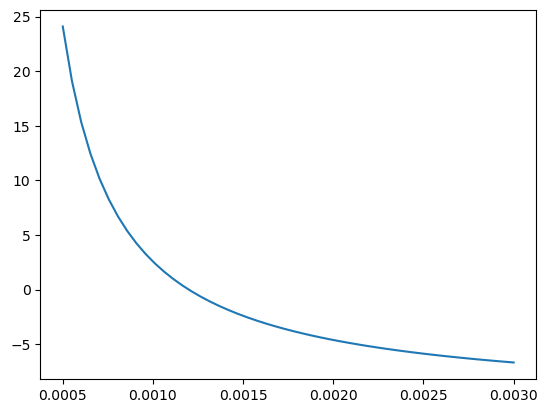

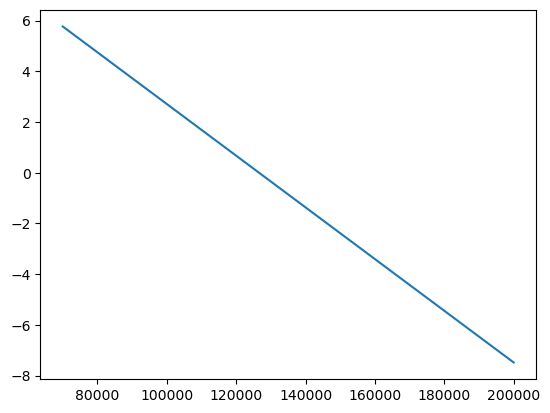

In [16]:
g = 9.81
rho = 1000
Po = 101325
A = 1E-4
V_diver = 0.2E-6

ho = 0.01
m = 0.001
P_ext = 101325

# xcrit against initial height of air bubble
ho_values = np.linspace(0, 0.05, 50)
xcrit_values = (g * np.power(m - rho * V_diver, 2) - A * (rho * A * ho_values * Po + rho * V_diver * P_ext - m * P_ext)) / (rho * g * A * (rho * V_diver - m))

plt.plot(ho_values, xcrit_values)
plt.show()

# xcrit against mass of diver
m_values = np.linspace(0.0005, 0.003, 50)
xcrit_values = (g * np.power(m_values - rho * V_diver, 2) - A * (rho * A * ho * Po + rho * V_diver * P_ext - m_values * P_ext)) / (rho * g * A * (rho * V_diver - m_values))

plt.plot(m_values, xcrit_values)
plt.show()

# xcrit against external pressure
Pext_values = np.linspace(70000, 200000, 50)
xcrit_values = (g * np.power(m - rho * V_diver, 2) - A * (rho * A * ho * Po + rho * V_diver * Pext_values - m * Pext_values)) / (rho * g * A * (rho * V_diver - m))

plt.plot(Pext_values, xcrit_values)
plt.show()

We can also solve the ODE given above, with changing the external pressure at different times using the code below:

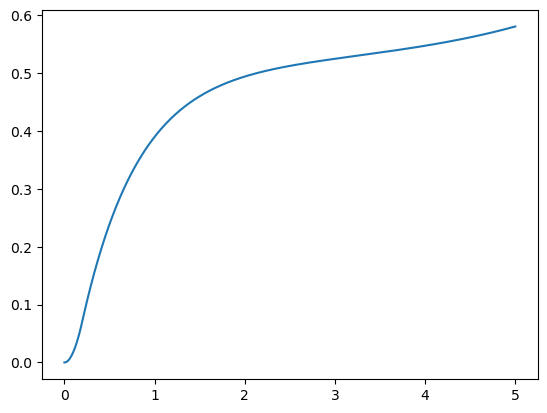

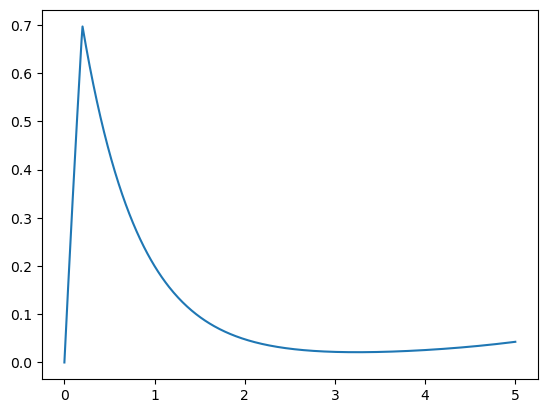

In [60]:
rho = 1000
g = 9.81
m = 0.001
k = 0.001
A = 1E-4
V_diver = 0.2E-6
Po = 101325
ho = 0.0105

Pi = 175000
Pf = Po
t_switch = 0.2
tend = 5

def P_ext_func(t):
    return Pi if t < t_switch else Pf

def cartesian_diver(t, vec, rho, g, m, k, A, V_diver, Po, ho):
    x, xp = vec
    P_ext = P_ext_func(t)

    return [
        xp if x >= 0 else 0,
        g - k / m * xp - rho * g / m * (V_diver + A * (np.sqrt(4 * rho * g * ho * Po + np.power(P_ext + rho * g * x, 2)) - (P_ext + rho * g * x))) / (2 * rho * g) if x >= 0 else 0
    ]

sol = integrate.solve_ivp(cartesian_diver, [0, tend], [0, 0], args=[rho, g, m, k, A, V_diver, Po, ho], max_step=0.01)

plt.plot(sol.t, sol.y[0])
plt.show()

plt.plot(sol.t, sol.y[1])
plt.show()

Generating data:

In [157]:
rho = 1000
g = 9.81
m = 0.004
k = 0.001
A = 3E-4
V_diver = 2E-6
Po = 101325
ho = 0.014

Pi = Po
Pf = Po
t_switch = 0
tend = 5

xo = 1.2 + 0.005 * (np.random.random() - 0.5)

def P_ext_func(t):
    return Pi if t < t_switch else Pf

def cartesian_diver(t, vec, rho, g, m, k, A, V_diver, Po, ho):
    x, xp = vec
    P_ext = P_ext_func(t)

    return [
        xp if x >= 0 else 0,
        g - k / m * xp - rho * g / m * (V_diver + A * (np.sqrt(4 * rho * g * ho * Po + np.power(P_ext + rho * g * x, 2)) - (P_ext + rho * g * x))) / (2 * rho * g) if x >= 0 else 0
    ]

dt = 1 / 60
sol = integrate.solve_ivp(cartesian_diver, [0, tend], [xo, 0], args=[rho, g, m, k, A, V_diver, Po, ho], max_step=dt)

data = []

t = 0
for i in range(len(sol.t)):
    if sol.t[i] - t >= dt:
        t = sol.t[i]
        data.append([sol.t[i], sol.y[0][i] + 0.005 * (np.random.random() - 0.5)])
    if sol.y[0][i] <= 0 or sol.y[0][i] >= 2:
        break

with open("data/irreversible cartesian diver/set12/data1.csv", "w") as f:
    np.savetxt(f, data, fmt="%.3f", delimiter=",")